# Lecture 8 - PyTorch

This will be the final lecture, today we will first have a brief introduction of deep learning, then we will look at some basics of using PyTorch to implement some simple models in deep learning.

1. Homework due today

# Basic Section (Start)
What is Neural Network:
1. [Recommended youtube video with great visual helpers](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
2.  Slides on course site
# Basic Section (End)

## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for Python are

- TensorFlow, Keras
- PyTorch

Working with TensorFlow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for TensorFlow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than TensorFlow, but it also has a higher level interface. PyTorch is more popular in the research community.

In Stanford courses and projects, it is very common to use PyTorch.

## Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are
1. Use the GPU to speed up computation
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [82]:
import torch
import numpy as np

The equivalent object to numpy arrays in PyTorch are called tensors, but they are just multidimensional arrays.

In [83]:
torch.tensor([2,3,4,5])

tensor([2, 3, 4, 5])

In [84]:
torch.zeros((5,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [85]:
x = torch.ones((5,5))
print(type(x))
x

<class 'torch.Tensor'>


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [86]:
2*x + 5

tensor([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]])

In [87]:
torch.randn(5,5)

tensor([[ 0.5098, -0.1428,  0.7089, -1.2880, -0.4879],
        [-0.1388, -0.3422, -1.7130,  0.4208,  0.0902],
        [-0.0070,  0.2284, -0.2772,  0.5980,  1.2274],
        [-1.7381, -1.3370,  0.1945, -0.6324, -0.0259],
        [-0.5987, -0.5542,  1.0880,  1.7805, -1.1394]])

In [88]:
x = torch.rand(25)
x

tensor([0.7969, 0.0792, 0.8780, 0.8403, 0.5745, 0.7364, 0.4532, 0.5269, 0.6353,
        0.0493, 0.0394, 0.3111, 0.3738, 0.5245, 0.2594, 0.4753, 0.0732, 0.3152,
        0.5095, 0.2218, 0.2549, 0.9722, 0.5688, 0.9450, 0.1898])

In [89]:
x=x.reshape(-1,5)
x

tensor([[0.7969, 0.0792, 0.8780, 0.8403, 0.5745],
        [0.7364, 0.4532, 0.5269, 0.6353, 0.0493],
        [0.0394, 0.3111, 0.3738, 0.5245, 0.2594],
        [0.4753, 0.0732, 0.3152, 0.5095, 0.2218],
        [0.2549, 0.9722, 0.5688, 0.9450, 0.1898]])

In [90]:
x.shape

torch.Size([5, 5])

In [91]:
print(torch.arange(10))
print(torch.eye(5))
print(torch.linspace(0,1,10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])


Some functions are a bit different

In [92]:
A = np.random.rand(5,5)
x = np.ones((5,1))
print(A)
print(x)

A@x

[[0.57860653 0.12350709 0.41390229 0.17291162 0.76952849]
 [0.53944518 0.87342218 0.34375145 0.03383577 0.3693543 ]
 [0.03189781 0.77280011 0.14828126 0.29334995 0.10907554]
 [0.40576985 0.950174   0.58958208 0.07766999 0.91885133]
 [0.79989498 0.75777491 0.73824198 0.46470267 0.6413701 ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


array([[2.05845603],
       [2.15980888],
       [1.35540468],
       [2.94204725],
       [3.40198463]])

In [93]:
A_ = torch.rand((5,5))
x_ = torch.ones(5,1)
print(A_)
print(x_)
A_@x_

tensor([[0.0654, 0.5832, 0.7834, 0.5172, 0.5806],
        [0.2415, 0.9853, 0.0420, 0.7158, 0.8510],
        [0.4330, 0.0905, 0.7468, 0.5740, 0.7172],
        [0.9222, 0.2012, 0.9953, 0.7680, 0.5001],
        [0.0733, 0.4108, 0.4638, 0.7694, 0.3507]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


tensor([[2.5298],
        [2.8356],
        [2.5614],
        [3.3867],
        [2.0681]])

In [ ]:
# class Test:
#   def __init__(self):
#     self.__data = 'Great__'
#     self.data = 'Great'
# test = Test()
# print(test.__data)

In [94]:
x = np.ones((5,1))
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [95]:
x_ = torch.ones(5,1)
print(x_)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


You can convert tensors to a numpy array that shares its memory with the pytorch tensor -> to use more library that are compatible to numpy but not pytorch

In [96]:
x = torch.ones(5,5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [97]:
xn = x.numpy()
print(type(xn))
xn

<class 'numpy.ndarray'>


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [98]:
# Changes in Numpy will cause changes in Tensor
xn[4,2]=10
xn

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., 10.,  1.,  1.]], dtype=float32)

In [99]:
x

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 10.,  1.,  1.]])

### Using the GPU

The GPU (Graphical Processing Unit) is a separate processing unit that is specialized to handle bulk computations required for rendering high quality graphics. It mainly consists of a large number of processor cores that are individually very slow, but because of their sheer number (around 2000) they can churn through computations very quickly.

In [100]:
import torch
"""
CUDA is a parallel computing platform
and application programming interface
that allows software to use certain types
of graphics processing units for general purpose processing
""";
#CUDA -> Recommend CME213 (C++)
torch.cuda.is_available()

True

Installing the GPU drivers and the CUDA toolkit can be quite messy, so if you just want to experiment with GPUs and deep learning libraries, you can use [Google colaboratory](https://colab.research.google.com/)

In [101]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [102]:
A = torch.rand(100,100)
B = torch.rand(100,100)

In [103]:
A@B

tensor([[26.3180, 26.2944, 23.6101,  ..., 26.1075, 24.1745, 24.6728],
        [25.8878, 26.9902, 23.9919,  ..., 27.1890, 26.1619, 26.0173],
        [22.8132, 24.1727, 22.9417,  ..., 25.9095, 22.9610, 23.9043],
        ...,
        [25.8806, 27.0250, 24.7991,  ..., 24.8536, 24.7872, 25.0519],
        [25.0513, 24.8801, 24.9222,  ..., 24.6244, 23.6362, 24.1914],
        [23.3239, 22.9218, 22.7339,  ..., 23.5111, 21.5087, 23.1358]])

In [104]:
A_gpu = A.to(gpu)
B_gpu = B.to(gpu)

In [105]:
A_gpu@B_gpu

tensor([[26.3180, 26.2944, 23.6101,  ..., 26.1075, 24.1745, 24.6728],
        [25.8878, 26.9902, 23.9919,  ..., 27.1890, 26.1619, 26.0173],
        [22.8132, 24.1727, 22.9417,  ..., 25.9095, 22.9610, 23.9043],
        ...,
        [25.8806, 27.0250, 24.7991,  ..., 24.8536, 24.7872, 25.0519],
        [25.0513, 24.8801, 24.9222,  ..., 24.6244, 23.6362, 24.1914],
        [23.3239, 22.9218, 22.7339,  ..., 23.5111, 21.5087, 23.1358]],
       device='cuda:0')

In [106]:
A@B_gpu #this won't work!

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [107]:
C_gpu = A_gpu@B_gpu
C = C_gpu.to(cpu)
C

tensor([[26.3180, 26.2944, 23.6101,  ..., 26.1075, 24.1745, 24.6728],
        [25.8878, 26.9902, 23.9919,  ..., 27.1890, 26.1619, 26.0173],
        [22.8132, 24.1727, 22.9417,  ..., 25.9095, 22.9610, 23.9043],
        ...,
        [25.8806, 27.0250, 24.7991,  ..., 24.8536, 24.7872, 25.0519],
        [25.0513, 24.8801, 24.9222,  ..., 24.6244, 23.6362, 24.1914],
        [23.3239, 22.9218, 22.7339,  ..., 23.5111, 21.5087, 23.1358]])

## Speedup from GPU
`%%timeit` is a Jupyter Notebook magic command that is used to measure the execution time of a Python code snippet. When you add `%%timeit` at the beginning of a cell in a Jupyter Notebook, it will run the code in the cell multiple times and measure the average execution time.

In [108]:
%%timeit
A = torch.rand(3000,3000)
B = torch.rand(3000,3000)
for i in range(5):
    B=torch.mm(A,B)


2.61 s ± 271 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [109]:
%%timeit
A = torch.rand(3000,3000, device = gpu)
B = torch.rand(3000,3000, device = gpu)
for i in range(5):
    B=torch.mm(A,B)

70 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Automatic Differentiation

PyTorch uses dynamic computation graphs to compute the gradients of the parameters. Only certain parameters need gradients: i.e. the parameters we are wanting to update: weights and biases!

In [110]:
x = torch.tensor([2.0])
w = torch.tensor([5.0], requires_grad = True)
b = torch.tensor([2.0], requires_grad = True)

In [111]:
y = w*x + b #12 = 5*2 + 2
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [112]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<LinalgVectorNormBackward0>)

Calling `x.backward()` on any tensor forces PyTorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [113]:
loss.backward()

In [114]:
w.grad

tensor([-2.])

In [115]:
b.grad

tensor([-1.])

We now can use the gradients of $w$ and $b$ to update their values (i.e. gradient descent). A helpful trick we can use here is telling PyTorch to skip the gradient calculations, which can help to reduce the memory usage and speed up computations. In this case, we don't want to update the gradients of $w$ and $b$ based on this parameter update.

In [116]:
# It will reduce memory consumption for computations
# that would otherwise have requires_grad=True
with torch.no_grad(): #when we update w and b, do not update gradients
    w -= 0.01 * w.grad
    b -= 0.3 * b.grad

In [117]:
w,b

(tensor([5.0200], requires_grad=True), tensor([2.3000], requires_grad=True))

In [118]:
w.grad, b.grad

(tensor([-2.]), tensor([-1.]))

In [119]:
# the gradients will accumulate and lead to incorrect updates and slower convergence.
w.grad.zero_()
b.grad.zero_()

w.grad, b.grad

(tensor([0.]), tensor([0.]))

After our update to our parameters, we can do another run through the network (forward propagation).

In [120]:
y = w*x + b

In [121]:
y

tensor([12.3400], grad_fn=<AddBackward0>)

As we can see, our prediction for $y$ has improved from 12 -> 12.34, meaning our $w$ and $b$ approximations have improved. We can calculate the loss again to see that it has improved, and again use backpropagation to update the gradients of $w$ and $b$.

In [122]:
loss = torch.norm( y - 13)
loss

tensor(0.6600, grad_fn=<LinalgVectorNormBackward0>)

In [123]:
loss.backward()
w.grad, b.grad

(tensor([-2.]), tensor([-1.]))

### Making it more compact

In [125]:
def model_fn(x,w,b):
    return w*x + b

In [126]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [127]:
w = torch.tensor([5.0], requires_grad = True)
b = torch.tensor([2.0], requires_grad = True)

In [128]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [129]:
y = model_fn(x,w,b)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    w -= 0.05 * w.grad
    b -= 0.05 * b.grad
w.grad.zero_()
b.grad.zero_()

print( f" w = {w}\n b = {b}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous values
for epoch in range(1,5):
    # running again
    print(15*'-')
    y = model_fn(x,w,b)
    loss = loss_fn(y,yt)
    loss.backward()
    with torch.no_grad():
        w -= 0.05 * w.grad
        b -= 0.05 * b.grad
    w.grad.zero_()
    b.grad.zero_()

    print( f"epoch = {epoch}\n w = {w} \n b = {b}\n y = {y}\n loss = {loss}")


 w = tensor([5.1000], requires_grad=True)
 b = tensor([2.0500], requires_grad=True)
 y = tensor([12.], grad_fn=<AddBackward0>)
 loss = 1.0
---------------
epoch = 1
 w = tensor([5.2000], requires_grad=True) 
 b = tensor([2.1000], requires_grad=True)
 y = tensor([12.2500], grad_fn=<AddBackward0>)
 loss = 0.75
---------------
epoch = 2
 w = tensor([5.3000], requires_grad=True) 
 b = tensor([2.1500], requires_grad=True)
 y = tensor([12.5000], grad_fn=<AddBackward0>)
 loss = 0.5
---------------
epoch = 3
 w = tensor([5.4000], requires_grad=True) 
 b = tensor([2.2000], requires_grad=True)
 y = tensor([12.7500], grad_fn=<AddBackward0>)
 loss = 0.2500009536743164
---------------
epoch = 4
 w = tensor([5.5000], requires_grad=True) 
 b = tensor([2.2500], requires_grad=True)
 y = tensor([13.0000], grad_fn=<AddBackward0>)
 loss = 9.5367431640625e-07


### Slightly more complicated problem

1. Forward propagation to get predicted yhat
2. Get the loss by loss_fun(y, yhat)
3. Backward propagation to get the gradient
4. Update parameters
5. Repeat 1 ~ 4 until convergence

In [130]:
import matplotlib.pyplot as plt

In [131]:
def model_fn(x,w,b):
    return w@x + b

In [132]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [133]:
w = torch.rand((5,5), requires_grad = True)
b = torch.ones((5,1), requires_grad = True)

In [135]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

loss = 44.82464599609375
loss = 40.931732177734375
loss = 37.377925872802734
loss = 34.212364196777344
loss = 31.477388381958008
loss = 29.198528289794922
loss = 27.374691009521484
loss = 25.973690032958984
loss = 24.937116622924805
loss = 24.192968368530273
loss = 23.669788360595703
loss = 23.306255340576172
loss = 23.054750442504883
loss = 22.880611419677734
loss = 22.759584426879883
loss = 22.675024032592773
loss = 22.615598678588867
loss = 22.573612213134766
loss = 22.543792724609375
loss = 22.52252197265625
loss = 22.50728988647461
loss = 22.496349334716797
loss = 22.488468170166016
loss = 22.482776641845703
loss = 22.478662490844727
loss = 22.475679397583008
loss = 22.47351837158203
loss = 22.471948623657227
loss = 22.470806121826172
loss = 22.469974517822266
loss = 22.469369888305664
loss = 22.468931198120117
loss = 22.468610763549805
loss = 22.468374252319336
loss = 22.46820640563965
loss = 22.468082427978516
loss = 22.46799087524414
loss = 22.467924118041992
loss = 22.46787643

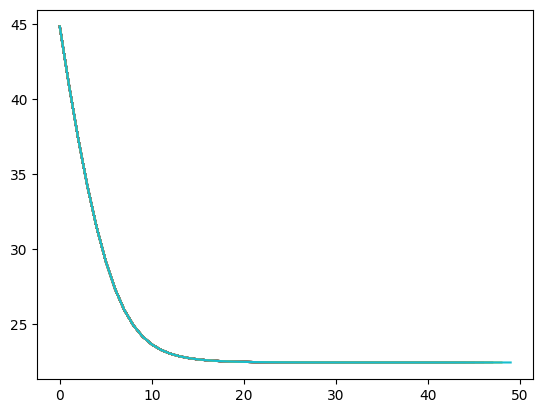

In [136]:
for i in range(50):
  # 1. Forward
  y = model_fn(x,w,b)
  # 2. Get loss
  loss = loss_fn(y,yt)
  # 3. backward
  loss.backward()
  # 4. Update
  with torch.no_grad():
      w -= 0.05 * w.grad
      b -= 0.05 * b.grad
  w.grad.zero_()
  b.grad.zero_()

  losses+=[loss.item()]
  print( f"loss = {loss}")
  plt.plot(losses);

## Using Library functions

In [137]:
model = torch.nn.Sequential(
    # create layer of sequence
    # F(WX + B)
    # First layer: ReLU(WX + B)
      # ReLU is important because it is doing some non-linear tranformation
    torch.nn.Linear(5, 5),
    torch.nn.ReLU(),

    # Output layer
    torch.nn.Linear(5, 1),
)

In [138]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1830, -0.2978,  0.0333, -0.2771,  0.2529],
         [ 0.0281,  0.3951, -0.0656, -0.2695, -0.4000],
         [-0.0229, -0.1013,  0.1985, -0.4058, -0.1500],
         [ 0.2423, -0.1930,  0.4154,  0.3227,  0.1673],
         [ 0.2084, -0.1922,  0.2175,  0.1592, -0.2300]], requires_grad=True),
 Parameter containing:
 tensor([-0.1145,  0.0325,  0.1902,  0.2504, -0.1801], requires_grad=True),
 Parameter containing:
 tensor([[-0.1076,  0.1497, -0.2267, -0.2153, -0.1310]], requires_grad=True),
 Parameter containing:
 tensor([-0.4372], requires_grad=True)]

In [140]:
#mean square loss → MSE = (1/n) * sum((y_pred - y_true)^2)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [141]:
x = torch.randn(100,5)
yt = torch.randn(100,1)
losses = []

Using the optim package to get an optimizer (we hard-coded standard gradient descent to update $w$ and $b$, here it will update itself based on whatever optimizer we choose).

Common optimizers:

*   Adam
*   SGD (Stochastic Gradient Descent)



In [142]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

`optimizer.step()` is used to update the model parameters based on the gradients computed during backpropagation. During training, the optimizer computes the gradients of the loss function with respect to the model parameters
  
`optimizer.zero_grad()` is used to set the gradients of all the model parameters to zero before computing the gradients for the next batch of data. If we don't zero out the gradients before computing the gradients for the next batch, the gradients will accumulate, leading to incorrect updates and slower convergence.

loss = 122.2519760131836
loss = 112.2354507446289
loss = 104.7008056640625
loss = 99.31035614013672
loss = 95.6781997680664
loss = 93.50662994384766
loss = 92.48434448242188
loss = 92.26673126220703
loss = 92.50293731689453
loss = 92.8240966796875
loss = 92.94263458251953
loss = 92.74740600585938
loss = 92.25298309326172
loss = 91.52928924560547
loss = 90.6669921875
loss = 89.83712768554688
loss = 89.16110229492188
loss = 88.71623992919922
loss = 88.42442321777344
loss = 88.27655792236328
loss = 88.22108459472656
loss = 88.20304870605469
loss = 88.16655731201172
loss = 88.09562683105469
loss = 88.01084899902344
loss = 87.91629791259766
loss = 87.79032897949219
loss = 87.65595245361328
loss = 87.47920989990234
loss = 87.27147674560547
loss = 87.07659149169922
loss = 86.92936706542969
loss = 86.8697280883789
loss = 86.82525634765625
loss = 86.76396179199219
loss = 86.6867904663086
loss = 86.5972900390625
loss = 86.46392822265625
loss = 86.28169250488281
loss = 86.06932067871094
loss = 85

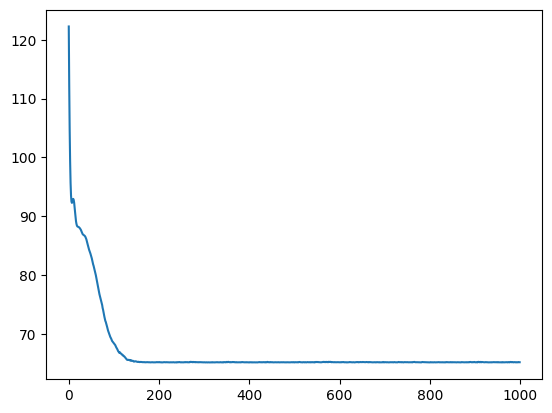

In [143]:
for i in range(1000):
    # feed data through model to get prediction
    y = model(x)

    # calculate loss (compare prediction to true value)
    loss = loss_fn(y,yt)

    # calculate gradients of parameters
    loss.backward()

    #make the parameter to take a step -> update the parameter
    optimizer.step()

    # clear gradients
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
plt.plot(losses);

## MNIST Example

In [144]:
from torchvision.datasets import MNIST

In [145]:
data = MNIST(".",download=True)

In [146]:
len(data)

60000

In [147]:
import numpy as np
img,y = data[np.random.randint(1,60000)]
print(y)
img

1


In [148]:
img,y = data[2]
img

In [149]:
print(data.data[2].shape)

torch.Size([28, 28])


In [150]:
print(data.targets[2])

tensor(4)


### MNIST Training

In [151]:
model = torch.nn.Sequential( # 28*28 = 784
    torch.nn.Linear(784,  100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [152]:
loss_fn = torch.nn.CrossEntropyLoss()

In [154]:
sample = np.random.choice(range(len(data.data)),1000)
x = data.data[sample].reshape(1000,-1).float()/255
yt = data.targets[sample]

In [156]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [158]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

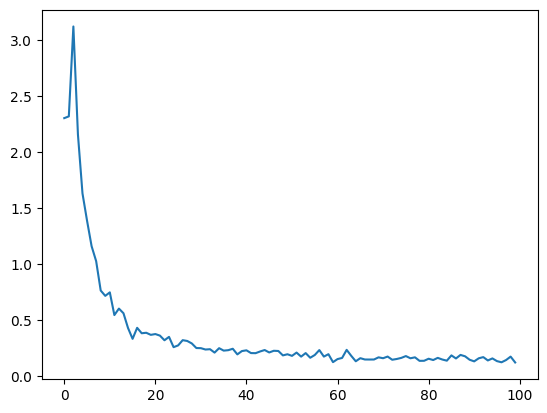

In [159]:
for i in range(100):
    # get data and true labels
    sample = np.random.choice(range(len(data.data)),1000)
    x = data.data[sample].reshape(1000,-1).float()/255
    yt = data.targets[sample]

    # get prediction
    y = model(x)

    # input (Tensor) – Predicted unnormalized logits
    # target (Tensor) – Ground truth class indices or class probabilities
    loss = loss_fn(y,yt)

    # compute gradients
    loss.backward()

    # update parameters and clear previous gradients
    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    #print( f"loss = {loss}")
plt.plot(losses);

In [160]:
x_test = data.data[-1000:].reshape(1000,-1).float()/255
y_test = data.targets[-1000:]

In [161]:
with torch.no_grad():
    y_pred = model(x_test)

In [162]:
y_test[4]

tensor(2)

In [163]:
y_pred.argmax(dim=1)[4]

tensor(2)

In [164]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.973


## Course Conclusion

1. By now you should have a sufficient introduction to the various ways one can use python for scientific computing. The best way to learn more is to start using python for whatever project you are working on. Only practice will make you comfortable with using python.   

Recommended Project Source: kaggle  

Recommended ML/DL Courses: CS229, 230, 231N, 224 series, 238, 246  

2. I appreciate your time to submit the course feedback, which means a lot to me and improvement for this course in the future  

